<a href="https://colab.research.google.com/github/Miragecore/SandBox/blob/devel/Colab/Random_Frame_Generare_From_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

라이브 스티칭 테스트를 위한 랜덤 프레임 생성  
큰 이미지를 원본으로 사용하여 랜덤 샘플로 1/3 이상 영상이 겹치게 프레임을 생성


In [2]:
#구글 드라이브 마운트
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#드라이브안에서 프로젝트 드라이브로 이동
import os;
root_path = '/content/drive/MyDrive/SandBox/Stitch'

os.chdir(root_path);

print(os.getcwd())

/content/drive/MyDrive/SandBox/Stitch


In [4]:
#from IPython.display import Image, display
import cv2, numpy as np

#Colab에서 imShow를 사용하기 위해 cv2_imshow를 사용한다.
from google.colab.patches import cv2_imshow

#SIFT or SURF는 4.3이상의 버전에서만 사용가능하다. 
if cv2.__version__ != "4.4.0":
  print(cv2.__version__)
  #설치후에는 런타임을 재시작해줘야 한다.
  !pip install opencv-contrib-python==4.4.0.44

4.1.2
     |████████████████████████████████| 55.7 MB 1.1 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [46]:
import math

source = cv2.imread('staringNight.png')
(img_h, img_w) = source.shape[:2]

roi_h = math.floor(img_h/6)
roi_w = math.floor(img_w/6)

print("roi height :" + str(roi_h) + " roi width :" + str(roi_w))
#cv2_imshow(source)


roi height :221 roi width :278


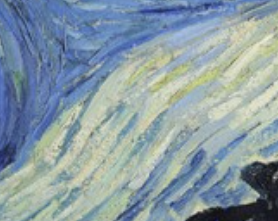

In [50]:

import random

random.seed(5)

#랜덤 시작점
start_x = random.randint(0, img_w)
start_y = random.randint(0, img_h)

first_image = source[start_y:start_y+roi_h,start_x:start_x+roi_w]
cv2_imshow(first_image)
#print(random.randint(0, w))


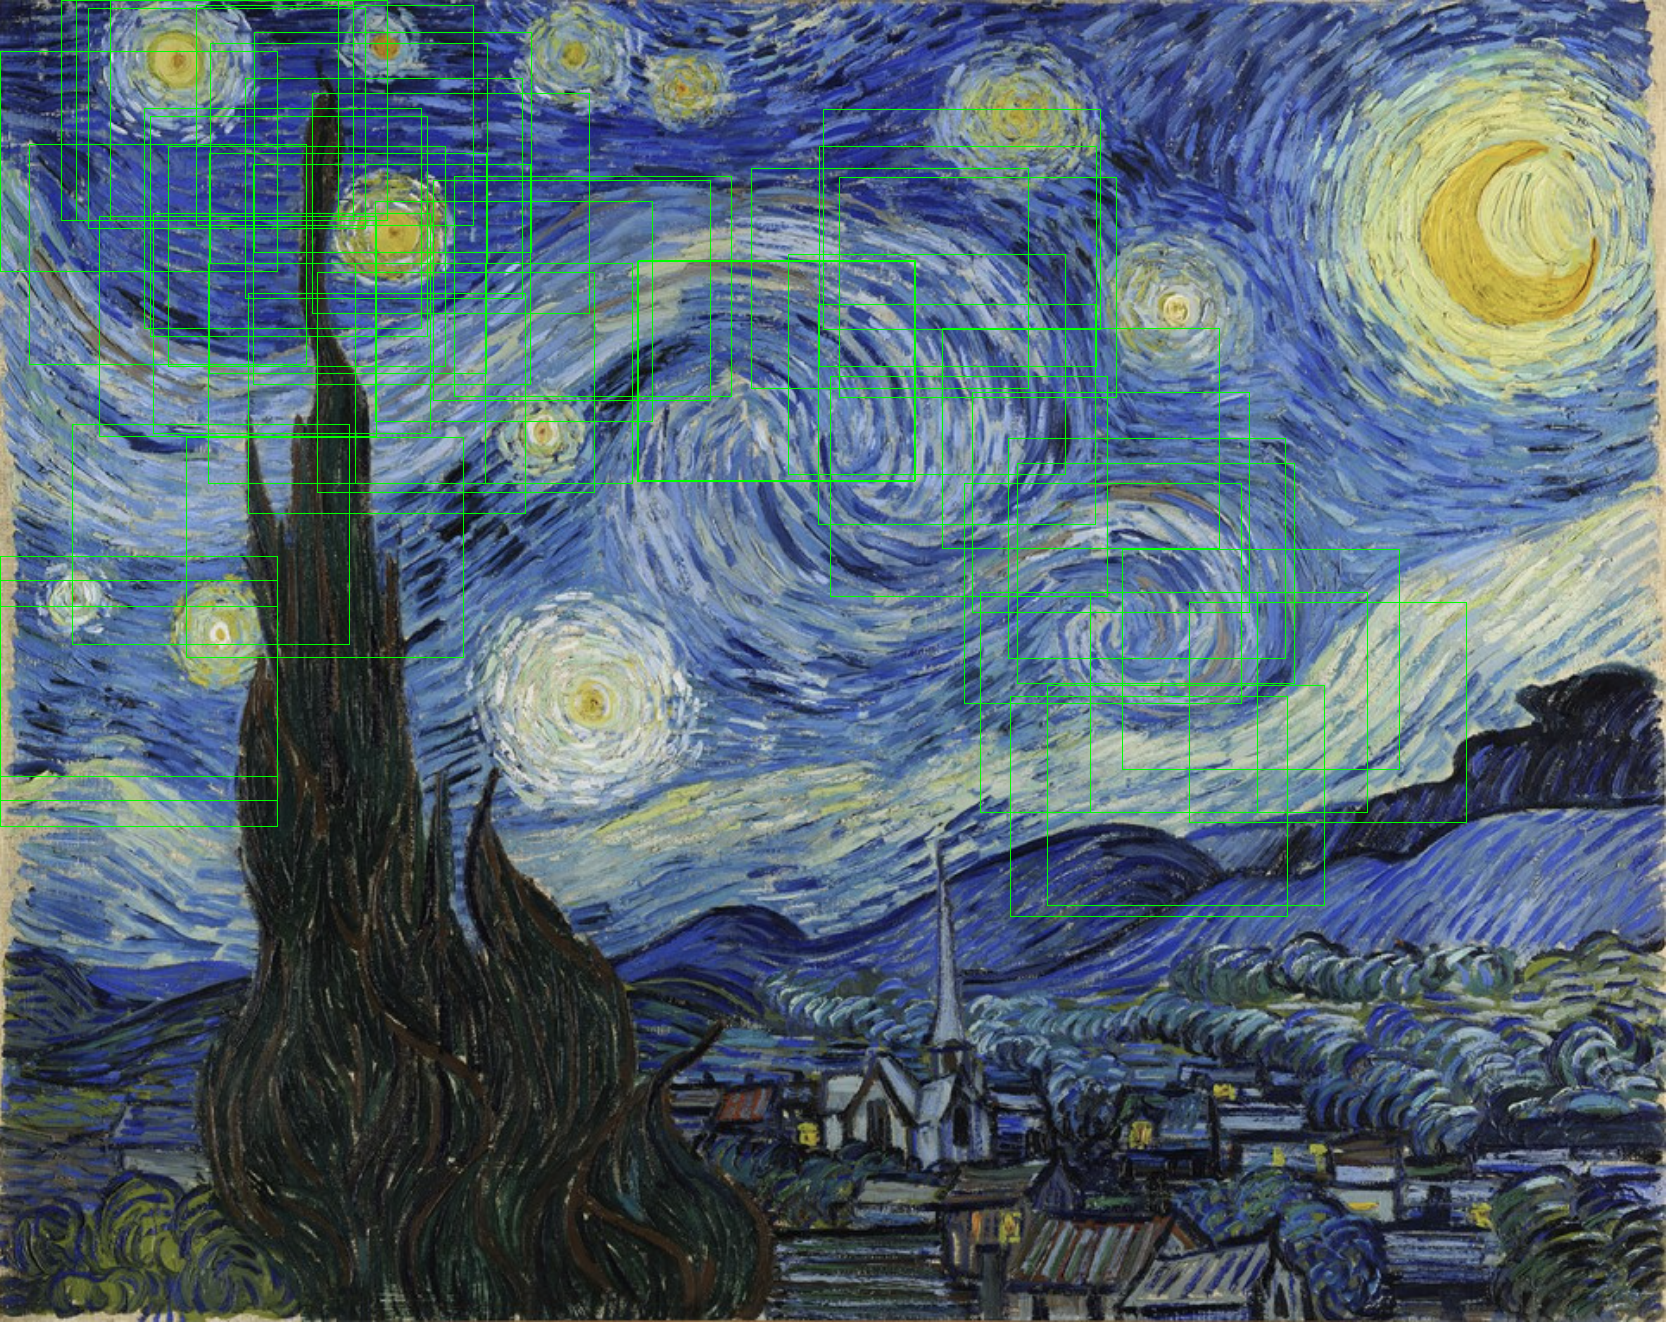

In [56]:
framecount = 50

old_image = first_image
oldx, oldy = start_x, start_y

#이동시 최소 1/3의 이미지는 겹치도록 
step_x = math.floor(roi_w * 2 / 3)
step_y = math.floor(roi_h * 2 / 3)

dp_image = source.copy()

while framecount:
  ww = random.randint(oldx - step_x, oldx + step_x)
  hh = random.randint(oldy - step_y, oldy + step_y)
  
  #value clip
  if ww + roi_w > img_w :
    ww = img_w - roi_w
  if hh + roi_h > img_h :
    hh = img_h - roi_h
  if ww < 0:
    ww = 0
  if hh < 0:
    hh = 0

  roi = dp_image[hh:hh+roi_h, ww:ww+roi_w]
  frame = source[hh:hh+roi_h, ww:ww+roi_w]
  
  cv2.rectangle(roi, (0,0), (roi_w-1, roi_h-1), (0,255,0)) 

  oldx = ww
  oldy = hh
  framecount -= 1

  #new_frame = source[hh: hh+r_h, ww:ww+r_w]
cv2_imshow(dp_image)
